In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from astropy import constants as const
from astropy import units as u
import math
from astropy.constants import c, L_sun, sigma_sb, M_jup, M_earth, G
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import USBL_model
from pyLIMA.models import PSBL_model
from collections import OrderedDict
from astropy.coordinates import SkyCoord

As an example we can take the case of TRAPPIST-1

In [3]:
# print(theta_E)
# print(theta_s/rho)
# mass.append(mass_kg.to('M_sun'))
# print(mass_kg.to('M_sun'))
# print((theta_E/(k*(pi_rel/theta_E))).decompose().to('M_sun'))
# plt.hist(mlist)

0.3327435928476573
thetaE se lo puede estimar asi con tE 0.3327435928476573
thetaE se lo puede estimar asi con rho 0.3327435928476573
la masa es 0.08000305454866778 solMass
la masa se la puede estimar asi 0.08000305454866777 solMass


In [48]:
# [type(dict_micro[f][0]) for f in dict_micro]

0.0 1
1.0
1518.9419061781632 1 / yr
Sampled velocities: γ1 = -152.1601, γ2 = -591.0722, γ3 = -1390.9225
1518.9419061781632
1518.9419061781632 1 / yr


In [50]:

gc = SkyCoord(l=0.5 * u.degree, b=-1.25 * u.degree, frame='galactic')
gc.icrs.dec.value
Ra = gc.icrs.ra.value
Dec = gc.icrs.dec.value

In [51]:
simulated_event = event.Event(ra = Ra, dec=Dec)
simulated_event.name = 'Simulated'   

t0 =dict_micro['t0'][0]

time_sim = np.linspace(t0-5*365,t0+5*365,5000)      
lightcurve_sim = np.c_[time_sim,[19.] * len(time_sim),[0.01] * len(time_sim)]

telescope = telescopes.Telescope(name='Simulation',
                                 camera_filter='I',
                                 lightcurve = lightcurve_sim.astype(float),
                                 lightcurve_names = ['time','mag','err_mag'],
                                 lightcurve_units = ['JD','mag','err_mag'],
                                     )
simulated_event.telescopes.append(telescope)


# pspl_params = [t0, u0, tE]
usbl = USBL_model.USBLmodel(simulated_event, parallax=['Full',t0], orbital_motion=['Keplerian', t0])

/home/anibal-pc/anaconda3/envs/pyLIMA_updated/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 3326 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA_updated/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 3326 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope Simulation: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA_updated/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 3326 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA_updated/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA_updated/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [55]:
data = pd.read_csv('/home/anibal-pc/Downloads/df_trilegal_radios.csv') #Koshimoto model and TRILEGAL
print(data)
ang_radii_E = []
radii_source = []
tstart_Roman = 2461508.763828608
mlist=[]
dict_micro = {'m_planet':[],'m_star':[],'t0': [],'te': [],'u0': [],'rho': [],'piEE': [],'piEN': [],'s':[],'q':[],'alpha':[]}
# for i in tqdm(range(int(1))):#4e+4))):#len(data))):
    # ml = (50*u.M_sun).value
i=0
m_planet = 1.017 *u.M_earth#np.random.uniform(0.0031463518655061432 , 13)* u.M_jup
m_star = 0.08 *u.M_sun#np.random.uniform(1 , 120 )* u.M_sun
q = (m_planet/m_star).decompose()
ml = (m_star+m_planet).decompose().to('M_sun')
# print(ml)
# ml = np.random.uniform((1 * u.M_sun).value, (120 * u.M_sun).value)
# ml = ml*u.M_sun
# print(ml)
DS = (data.iloc[i]['D_S'] * u.pc).to('kpc')
DL = (data.iloc[i]['D_L'] * u.pc).to('kpc')
c = const.c
G = const.G
yr2day = 365.25
pi_rel = ((1 / DL) - (1 / DS))
# print(pi_rel)
k = 4 * G / (c ** 2)
aconv = (180 * 60 * 60 * 1000) / math.pi
theta_E = np.sqrt(k * pi_rel * ml).decompose() * aconv #multiplico por aconv para pasar de rad a mas
print(theta_E)

mu_rel = data.iloc[i]['mu_rel']
tE = float((theta_E/mu_rel)*yr2day)
print('thetaE se lo puede estimar asi con tE', mu_rel*tE/yr2day)

piE = float(pi_rel.value/theta_E)
ang_radii_E.append(theta_E)
Rstar = data['radius'][i]*u.R_sun
theta_s = np.arctan(Rstar/DS).decompose().to('mas').value
radii_source.append(theta_s)


#------------------------------------------------------------------------------------------------
# t0 = np.random.uniform(tstart_Roman,
                       # tstart_Roman + 5 * 365)  # from 100 day before Roman is launched to one year later
u0 = np.random.uniform(0, 3)
rho = float((theta_s/theta_E).value)

print('thetaE se lo puede estimar asi con rho', theta_s/rho)
phi = np.random.uniform(0, np.pi)
piEE = piE * np.cos(phi)
piEN = piE * np.sin(phi)
d = 0.01154775   #orbit semi major axis
s = float(((np.arctan(d*u.au/DL).to('mas'))/(theta_E)).value)

print('la masa es', (m_planet+m_star).to('M_sun'))

print('la masa se la puede estimar asi', ((theta_E/aconv**2)*u.kpc/(k*np.sqrt(piEN**2+piEE**2))).decompose().to('M_sun'))

# print(s)
# print(theta_E)
# s = np.random.uniform(0,np.arctan(d/dl)/theta_E)
t0 = np.random.uniform(tstart_Roman,
                   tstart_Roman + 5 * 365)
dict_micro['u0'].append(u0)
dict_micro['te'].append(tE)
dict_micro['rho'].append(rho)
dict_micro['piEE'].append(piEE)
dict_micro['piEN'].append(piEN)
dict_micro['t0'].append(t0)
dict_micro['q'].append(q.value)
dict_micro['s'].append(s)
dict_micro['alpha'].append(np.random.uniform(0,np.pi))
dict_micro['m_planet'].append(m_planet)
dict_micro['m_star'].append(m_star)    
mass_kg = (pi_rel/(k*(pi_rel/theta_E)**2)).decompose()
# print(mass_kg.to('M_sun'))
# print((theta_E/aconv)**2)
# print((((theta_E/aconv)**2)/(k*pi_rel)).decompose().to('M_sun'))
mlist.append((((theta_E/aconv)**2)/(k*pi_rel)).decompose().to('M_sun'))


T = (1.51087637*u.day).to('year') #orbital period
sz = 0

r_s = sz/s
a_s = 1
print(r_s, a_s)

# Compute orbital frequency using Kepler's third law
n = 2 * np.pi / T

# Compute denominator of equation (A5)
denominator = a_s * np.sqrt((-1 + 2 * a_s) * (1 + r_s**2))
print(denominator)
# Compute the required velocity magnitude
velocity_magnitude = n * denominator
print(velocity_magnitude)


# Sample random velocity components that satisfy the magnitude constraint
def sample_velocities(magnitude):
    while True:
        gamma = np.random.normal(size=3)  # Sample from normal distribution
        gamma *= magnitude / np.linalg.norm(gamma)  # Normalize to correct magnitude
        return gamma

# Generate a valid velocity set
gamma1, gamma2, gamma3 = sample_velocities(velocity_magnitude.value)

# Output results
print(f"Sampled velocities: γ1 = {gamma1:.4f}, γ2 = {gamma2:.4f}, γ3 = {gamma3:.4f}")
print(np.sqrt(gamma1**2 +gamma2**2+ gamma3**2))
print(velocity_magnitude)

v_para = gamma1
v_perp = gamma2
v_radial = gamma3

f_source = 12.34567
f_blend = 1.234456

params = [ dict_micro['t0'][0], dict_micro['u0'][0], dict_micro['te'][0], dict_micro['rho'][0],
          dict_micro['s'][0],dict_micro['q'][0], np.pi/4, dict_micro['piEN'][0], dict_micro['piEE'][0] , v_para, v_perp, v_radial, r_s ,a_s, f_source, f_blend]

pyLIMA_parameters = usbl.compute_pyLIMA_parameters(params , fancy_parameters=False)
print(pyLIMA_parameters)

              u       g       r       i       z       Y     W149    radius  \
0        27.940  25.112  23.791  23.052  22.687  22.509  22.4888  0.204717   
1        32.152  28.801  27.358  25.353  24.371  23.905  23.7048  0.256539   
2        29.916  26.583  25.143  23.976  23.416  23.174  23.0758  0.377705   
3        19.718  18.786  18.695  18.736  18.808  18.839  19.3448  1.236383   
4        28.293  25.580  24.286  23.587  23.239  23.064  23.0568  0.232088   
...         ...     ...     ...     ...     ...     ...      ...       ...   
6752291  21.726  19.667  18.856  18.583  18.465  18.388  18.4668  0.739866   
6752292  31.351  28.019  26.612  25.096  24.364  24.047  23.9338  0.155472   
6752293  31.896  28.454  27.026  25.409  24.634  24.297  24.1688  0.144928   
6752294  31.964  28.363  26.911  25.127  24.277  23.904  23.7488  0.134634   
6752295  32.057  28.583  27.151  25.501  24.712  24.368  24.2348  0.142283   

          D_S   D_L    mu_rel  
0        7708  3337  1.752341  

In [46]:
# dict_micro['te'][0]

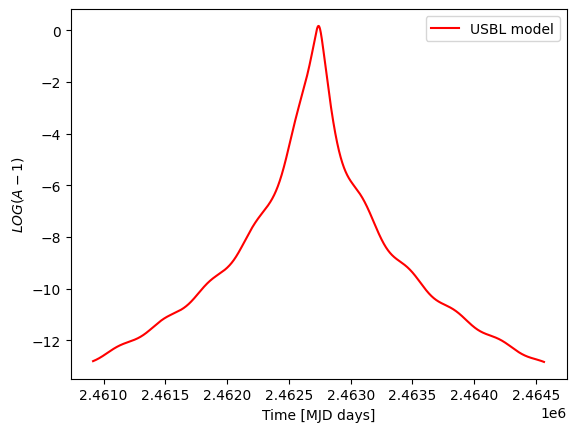

In [53]:
magnification = usbl.model_magnification(telescope, pyLIMA_parameters)
magnification
log_magnification = np.log(magnification-1)
# %matplotlib widget
plt.plot(time_sim,log_magnification,"r",label="USBL model")
# plt.plot(time_sim,magnification,"r",label="USBL model")
# plt.xlim(t0-tE,t0+tE)

plt.xlabel("Time [MJD days]")
plt.ylabel("$LOG(A-1)$")
plt.legend()
plt.show()       
plt.close()

In [1]:
# help(usbl)

In [36]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool

p = figure(
    title="USBL Model",
    x_axis_label="Time [MJD days]",
    y_axis_label="LOG(A-1)",
        width=1600,  # Use `width` instead of `plot_width`
    height=800,  # Use `height` instead of `plot_height`
    x_range=(t0 - 5*tE, t0 + 5*tE),
    tools="pan,box_zoom,reset,save"
)

# Add the plot
p.line(time_sim, log_magnification, color="red", legend_label="USBL model", line_width=2)

# Add hover tool for interactivity
hover = HoverTool(
    tooltips=[("Time", "@x"), ("LOG(A-1)", "@y")],
    mode='vline'
)
p.add_tools(hover)

# Customize legend and layout
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)

3.003489348850793e-06
1.00895228682449 mas
73.703964552529 d
0.00012389089318922777 1 / mas
0.24778178637845552
